# 图像统计滤波算法

In [1]:
#coding:utf-8
import numpy as np
%matplotlib  inline
import cv2
import matplotlib.pyplot as plt
import pandas as pd
from pandas import DataFrame
from scipy.ndimage.filters import convolve
from skimage.util import view_as_windows as viewW

In [2]:
src = cv2.cvtColor(cv2.imread('../datas/f2.jpg'),cv2.COLOR_BGR2RGB)

In [6]:
# 灰度化图片
def rgb2gray(rgb):
    return np.dot(rgb[..., :3], [0.299, 0.587, 0.114]).astype(np.uint8)

def statistical_filter(src,T):
    rows,cols = src.shape[0],src.shape[1]
    gray = rgb2gray(src)
    rgb = np.float64(src)
    dst = np.zeros(src.shape,dtype=np.float64)
    w_value = np.zeros((9),np.float64)
    for i in range(1,rows-1):
        for j in range(1,cols-1):
            w_value[0] = gray[i-1,j-1]
            w_value[1] = gray[i,j-1]
            w_value[2] = gray[i+1,j-1]
            w_value[3] = gray[i-1,j]
            w_value[4] = gray[i,j]
            w_value[5] = gray[i+1,j]
            w_value[6] = gray[i-1,j+1]
            w_value[7] = gray[i,j+1]
            w_value[8] = gray[i+1,j+1]
            
            g_mean = np.mean(w_value)
            std_s = np.sqrt(np.sum(np.power(w_value - g_mean,2) / 9.0))
            r,g,b = 0,0,0
            if w_value[4] >= std_s:
                for k in range(-1,2):
                    for m in range(-1,2):
                        r += rgb[i+m,j+k,0] / 9
                        g += rgb[i+m,j+k,1] / 9
                        b += rgb[i+m,j+k,2] / 9
                dst[i,j,0] = r
                dst[i,j,1] = g
                dst[i,j,2] = b
    return cv2.convertScaleAbs(dst)

In [7]:
dst = statistical_filter(src,0.2)

Text(0.5,1,'Statistical Filter')

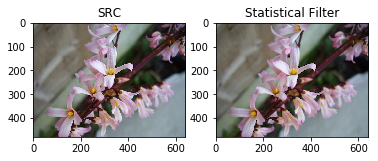

In [8]:
plt.subplot(121)
plt.imshow(src)
plt.title('SRC')
plt.subplot(122)
plt.imshow(dst)
plt.title('Statistical Filter')

参考：

[1]. https://blog.csdn.net/trent1985/article/details/45110561